In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saldanha za
lebu cl
codrington ag
talnakh ru
ulladulla au
strezhevoy ru
kapaa us
bell ville ar
kapaa us
port alfred za
yarada in
mataura pf
namatanai pg
iqaluit ca
bluff nz
vaini to
mataura pf
maridi sd
paamiut gl
torbat-e jam ir
tiksi ru
ushuaia ar
hay river ca
busselton au
taolanaro mg
lorengau pg
kastamonu tr
barrow us
rakovnik cz
awbari ly
east london za
ushuaia ar
puerto ayora ec
souillac mu
hobart au
rikitea pf
dikson ru
butaritari ki
vaini to
talnakh ru
kodiak us
vestmannaeyjar is
kiama au
belyy yar ru
hilo us
lompoc us
vila franca do campo pt
ketchikan us
pevek ru
mwaya tz
jamestown sh
korla cn
rikitea pf
cape town za
ushuaia ar
antofagasta cl
rudnogorsk ru
burns lake ca
kapaa us
new norfolk au
toliary mg
east london za
punta arenas cl
kununurra au
wanaka nz
luanda ao
galle lk
jiddah sa
new norfolk au
hami cn
sabang id
port augusta au
timra se
norman wells ca
loten no
vaini to
umzimvubu za
newport us
san joaquin bo
taolanaro mg
ilulissat gl
barrow us
tasiilaq gl
cape town za
my

tsihombe mg
rikitea pf
ushuaia ar
amderma ru
illoqqortoormiut gl
albany au
bandundu cd
mataura pf
college us
ponta do sol pt
saskylakh ru
skibotn no
rikitea pf
vaini to
anadyr ru
mahebourg mu
general roca ar
warqla dz
njinikom cm
guerrero negro mx
atuona pf
hithadhoo mv
longyearbyen sj
mataura pf
zurrieq mt
tallahassee us
wolfsberg at
cidreira br
mataura pf
butaritari ki
upata ve
albany au
taolanaro mg
vila velha br
puerto ayora ec
ushuaia ar
wasilla us
soyo ao
parabel ru
avarua ck
atuona pf
vanimo pg
haibowan cn
jamestown sh
broome au
tabuk sa
xuanzhou cn
srednekolymsk ru
carnarvon au
hambantota lk
saint-joseph re
itarema br
albany au
salinopolis br
zhigansk ru
ushuaia ar
aksu kz
dikson ru
maturin ve
fortuna us
taolanaro mg
albany au
severo-kurilsk ru
whitehorse ca
hay river ca
alofi nu
vaini to
cape town za
mahebourg mu
castro cl
iqaluit ca
lukovetskiy ru
puerto ayora ec
ushuaia ar
hermanus za
maceio br
san rafael ar
ushuaia ar
rikitea pf
torbay ca
busselton au
noumea nc
rikitea pf
a

chifeng cn
busselton au
mataura pf
avarua ck
clyde river ca
atuona pf
rikitea pf
dikson ru
nanortalik gl
hermanus za
padang id
mataura pf
punta arenas cl
agen fr
namibe ao
kodiak us
chippewa falls us
kapaa us
hermanus za
saldanha za
tuktoyaktuk ca
bengkulu id
qasigiannguit gl
ushuaia ar


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import gkey


In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + gkey


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
City not found. Skipping...
Processing Record 2 of Set 1 | lebu
City not found. Skipping...
Processing Record 3 of Set 1 | codrington
City not found. Skipping...
Processing Record 4 of Set 1 | talnakh
City not found. Skipping...
Processing Record 5 of Set 1 | ulladulla
City not found. Skipping...
Processing Record 6 of Set 1 | strezhevoy
City not found. Skipping...
Processing Record 7 of Set 1 | kapaa
City not found. Skipping...
Processing Record 8 of Set 1 | bell ville
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
City not found. Skipping...
Processing Record 10 of Set 1 | yarada
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
City not found. Skipping...
Processing Record 12 of Set 1 | namatanai
City not found. Skipping...
Processing Record 13 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
City not found.

City not found. Skipping...
Processing Record 24 of Set 3 | margate
City not found. Skipping...
Processing Record 25 of Set 3 | saint-philippe
City not found. Skipping...
Processing Record 26 of Set 3 | moundsville
City not found. Skipping...
Processing Record 27 of Set 3 | amderma
City not found. Skipping...
Processing Record 28 of Set 3 | dingle
City not found. Skipping...
Processing Record 29 of Set 3 | grindavik
City not found. Skipping...
Processing Record 30 of Set 3 | yiyang
City not found. Skipping...
Processing Record 31 of Set 3 | cascais
City not found. Skipping...
Processing Record 32 of Set 3 | tsihombe
City not found. Skipping...
Processing Record 33 of Set 3 | mount isa
City not found. Skipping...
Processing Record 34 of Set 3 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 3 | garissa
City not found. Skipping...
Processing Record 36 of Set 3 | inhambane
City not found. Skipping...
Processing Record 37 of Set 3 | omboue
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 4 of Set 6 | gamba
City not found. Skipping...
Processing Record 5 of Set 6 | arraial do cabo
City not found. Skipping...
Processing Record 6 of Set 6 | linshu
City not found. Skipping...
Processing Record 7 of Set 6 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 6 | davila
City not found. Skipping...
Processing Record 9 of Set 6 | silae
City not found. Skipping...
Processing Record 10 of Set 6 | port macquarie
City not found. Skipping...
Processing Record 11 of Set 6 | bambanglipuro
City not found. Skipping...
Processing Record 12 of Set 6 | te anau
City not found. Skipping...
Processing Record 13 of Set 6 | champerico
City not found. Skipping...
Processing Record 14 of Set 6 | pandamatenga
City not found. Skipping...
Processing Record 15 of Set 6 | isangel
City not found. Skipping...
Processing Record 16 of Set 6 | luganville
City not found. Skipping...
Processing Record 17 of Set 6 | oga
City not found. Skipping...

City not found. Skipping...
Processing Record 25 of Set 8 | njinikom
City not found. Skipping...
Processing Record 26 of Set 8 | guerrero negro
City not found. Skipping...
Processing Record 27 of Set 8 | zurrieq
City not found. Skipping...
Processing Record 28 of Set 8 | tallahassee
City not found. Skipping...
Processing Record 29 of Set 8 | wolfsberg
City not found. Skipping...
Processing Record 30 of Set 8 | upata
City not found. Skipping...
Processing Record 31 of Set 8 | vila velha
City not found. Skipping...
Processing Record 32 of Set 8 | wasilla
City not found. Skipping...
Processing Record 33 of Set 8 | soyo
City not found. Skipping...
Processing Record 34 of Set 8 | parabel
City not found. Skipping...
Processing Record 35 of Set 8 | haibowan
City not found. Skipping...
Processing Record 36 of Set 8 | broome
City not found. Skipping...
Processing Record 37 of Set 8 | tabuk
City not found. Skipping...
Processing Record 38 of Set 8 | xuanzhou
City not found. Skipping...
Processin

City not found. Skipping...
Processing Record 4 of Set 11 | octeville
City not found. Skipping...
Processing Record 5 of Set 11 | naberera
City not found. Skipping...
Processing Record 6 of Set 11 | den helder
City not found. Skipping...
Processing Record 7 of Set 11 | ascension
City not found. Skipping...
Processing Record 8 of Set 11 | palencia
City not found. Skipping...
Processing Record 9 of Set 11 | sept-iles
City not found. Skipping...
Processing Record 10 of Set 11 | riyadh
City not found. Skipping...
Processing Record 11 of Set 11 | ossora
City not found. Skipping...
Processing Record 12 of Set 11 | port shepstone
City not found. Skipping...
Processing Record 13 of Set 11 | lata
City not found. Skipping...
Processing Record 14 of Set 11 | port hardy
City not found. Skipping...
Processing Record 15 of Set 11 | lagoa
City not found. Skipping...
Processing Record 16 of Set 11 | luena
City not found. Skipping...
Processing Record 17 of Set 11 | watrous
City not found. Skipping...


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,52.12,87,0,4.61,ZA,2021-07-16 01:20:24
1,Rikitea,-23.1203,-134.9692,73.22,74,54,8.37,PF,2021-07-16 01:20:24
2,Kalat,29.0225,66.5916,69.24,78,96,5.26,PK,2021-07-16 01:20:24
3,Umm Kaddadah,13.6017,26.6876,84.63,51,92,13.96,SD,2021-07-16 01:20:24
4,Norman Wells,65.2820,-126.8329,51.84,43,75,4.61,CA,2021-07-16 01:20:24
5,East London,-33.0153,27.9116,54.14,37,0,6.20,ZA,2021-07-16 01:20:25
6,Okhotsk,59.3833,143.3000,62.60,71,100,9.46,RU,2021-07-16 01:20:25
7,Punta Arenas,-53.1500,-70.9167,37.51,93,90,10.36,CL,2021-07-16 01:20:25
8,Diebougou,10.9667,-3.2500,77.41,75,100,4.29,BF,2021-07-16 01:20:25
9,Cidreira,-30.1811,-50.2056,56.26,90,25,9.31,BR,2021-07-16 01:20:26


In [12]:
df = pd.DataFrame(city_data)
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-07-16 01:20:24,-33.9258,18.4232,52.12,87,0,4.61
1,Rikitea,PF,2021-07-16 01:20:24,-23.1203,-134.9692,73.22,74,54,8.37
2,Kalat,PK,2021-07-16 01:20:24,29.0225,66.5916,69.24,78,96,5.26
3,Umm Kaddadah,SD,2021-07-16 01:20:24,13.6017,26.6876,84.63,51,92,13.96
4,Norman Wells,CA,2021-07-16 01:20:24,65.2820,-126.8329,51.84,43,75,4.61
5,East London,ZA,2021-07-16 01:20:25,-33.0153,27.9116,54.14,37,0,6.20
6,Okhotsk,RU,2021-07-16 01:20:25,59.3833,143.3000,62.60,71,100,9.46
7,Punta Arenas,CL,2021-07-16 01:20:25,-53.1500,-70.9167,37.51,93,90,10.36
8,Diebougou,BF,2021-07-16 01:20:25,10.9667,-3.2500,77.41,75,100,4.29
9,Cidreira,BR,2021-07-16 01:20:26,-30.1811,-50.2056,56.26,90,25,9.31


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

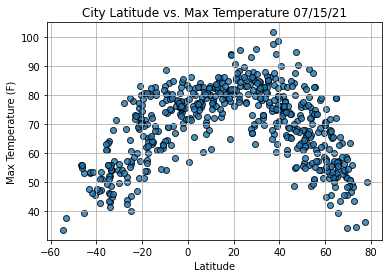

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

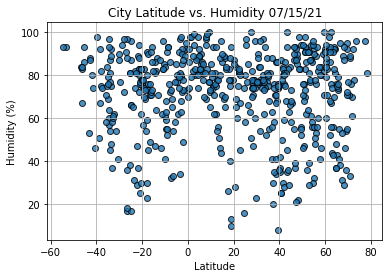

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

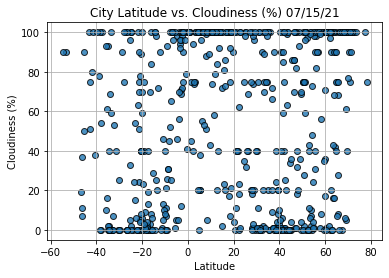

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

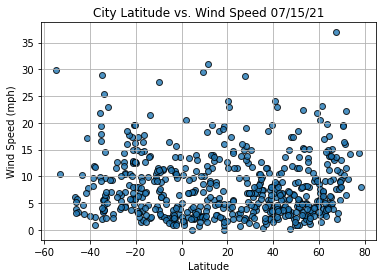

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Pisco
Country                        PE
Date          2021-07-16 01:20:26
Lat                         -13.7
Lng                      -76.2167
Max Temp                    61.02
Humidity                       88
Cloudiness                     20
Wind Speed                   13.8
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kalat,PK,2021-07-16 01:20:24,29.0225,66.5916,69.24,78,96,5.26
3,Umm Kaddadah,SD,2021-07-16 01:20:24,13.6017,26.6876,84.63,51,92,13.96
4,Norman Wells,CA,2021-07-16 01:20:24,65.2820,-126.8329,51.84,43,75,4.61
6,Okhotsk,RU,2021-07-16 01:20:25,59.3833,143.3000,62.60,71,100,9.46
8,Diebougou,BF,2021-07-16 01:20:25,10.9667,-3.2500,77.41,75,100,4.29


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

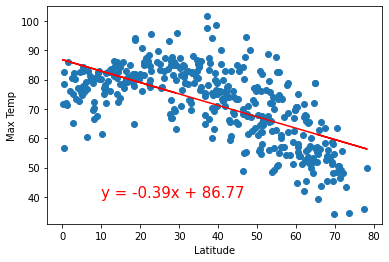

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

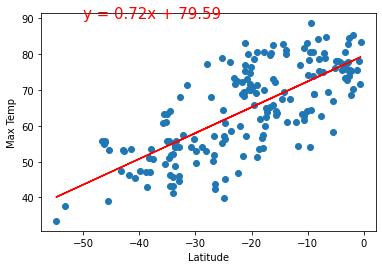

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

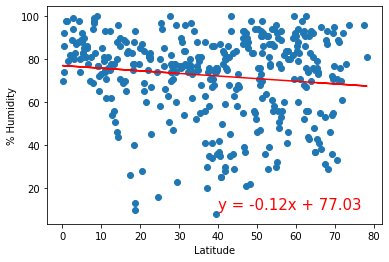

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Check why \n does not run

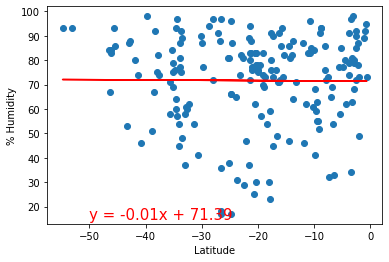

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

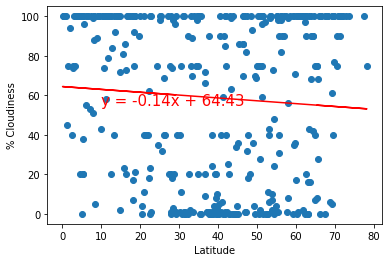

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

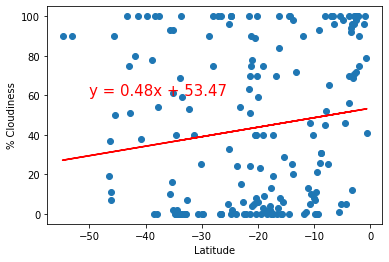

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

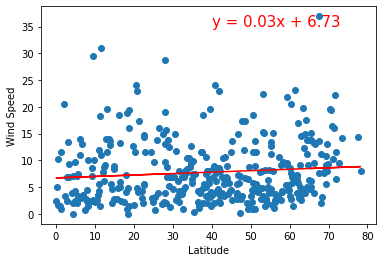

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

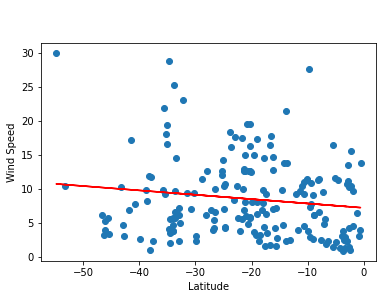

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [1]:
# Continue at 6.5.1